# Analyzing simulation data

In [1]:
#from IPython.core.display import HTML
#HTML("<script>Jupyter.notebook.kernel.restart()</script>")

In [2]:
%load_ext autoreload
%autoreload 2
from prediction_grids import *

## Testing Experiment class

In [5]:
#simulation_dir = "./simulation/fig1b-6561-100"
simulation_dir = "/home/rio/ml_topological_phases_in_real_space/simulation/nearest_neighbour"
experiment_name = "0"
experiment = Experiment(simulation_dir, experiment_name)

#### Viewing Train/Val/Test split

In [6]:
experiment.print_train_val_test()

% train:  0.08474317939338516
% val:  0.7620789513793629
% test:  0.15317786922725193
% train + val + test:  1.0


number of train hamiltonians:  556
number of val hamiltonians:  5000
number of test hamiltonians:  1005
total number of hamiltonians:  6561


#### Viewing data set summary

In [8]:
experiment.print_phases()

Summary of train + val data

% train/val phases: 
0    0.507919
1    0.492081
Name: phase, dtype: float64


total train/val phases: 
0    2822
1    2734
Name: phase, dtype: int64


Summary of test data

% test phases: 
1    0.552133
0    0.447867
Name: phase, dtype: float64


total test phases: 
1    466
0    378
Name: phase, dtype: int64


Summary of train + val + test data

% phases: 
1    0.5
0    0.5
Name: phase, dtype: float64


total phases: 
1    3200
0    3200
Name: phase, dtype: int64


#### Viewing eigenvector summary

In [9]:
experiment.eigenvector_summary.head()

,id,phase,pred_phase,type_of
0,0,999,0,test
1,0,999,0,test
2,0,999,0,test
3,0,999,0,test
4,0,999,0,test


#### Viewing hamiltonian summary

In [10]:
experiment.hamiltonian_summary.head()

,t1,t2,type_of,0,1,phase,pred_phase
id,,,,,,,
0,-2.0,-2.00,test,0.52,0.48,999,0
1,-2.0,-1.95,test,0.67,0.33,0,0
2,-2.0,-1.90,test,0.72,0.28,0,0
3,-2.0,-1.85,test,0.81,0.19,0,0
4,-2.0,-1.80,test,0.88,0.12,0,0


#### Viewing accuracy 

In [11]:
experiment.accuracy

{'eigenvector_train': 0.981726618705036,
 'eigenvector_val': 0.965216,
 'eigenvector_test': 0.8052843601895735,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.995260663507109}

#### Visualizing train/val/test splits with scatter plot

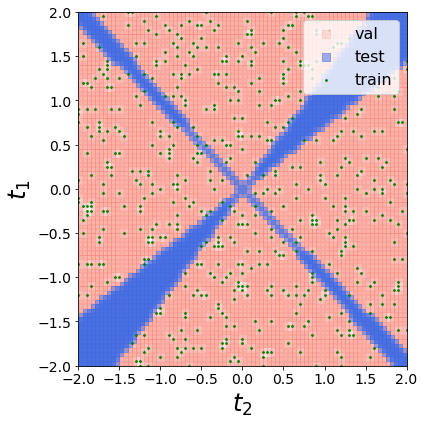

In [14]:
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)} 
#val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
#test_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "blue", "label": "test"}
#train_params={"marker": "o", "s": 10, "color": "red", "label": "train"}
val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
test_params={"marker": "s", "s": 64, "alpha": 0.5, "color": "royalblue", "label": "test"}
train_params={"marker": "o", "s": 3, "alpha": 1, "color": "green", "label": "train"}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
#savefig_params = {"fname": os.path.join(experiment.simulation_dir, "fig1a-6561_train_val_test_0.png")}
path_to_save = "/home/rio/1901.01963/fig1a-6561-100-train_val_test_0.png"
savefig_params = {"fname": path_to_save}
experiment.scatter_train_val_test(val_params, test_params, train_params, legend_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params,\
                                 tight_params, savefig_params)

#### Plotting train winding labels with scatter plot.

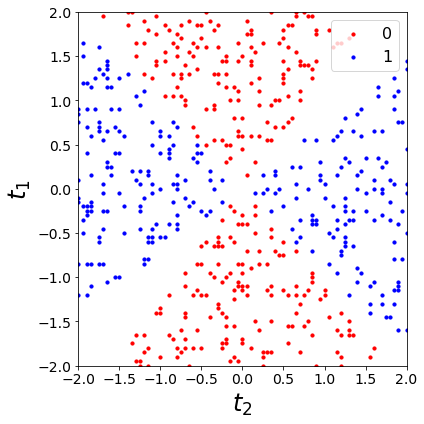

In [17]:
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)} 
winding_params = {0: {"marker": "o", "s": 10, "color": "red", "label": 0}, \
                  1: {"marker": "o", "s": 10, "color": "blue", "label": 1}, \
                  }
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
path_to_save = "/home/rio/1901.01963/fig1a-6561-100-train_winding_labels_0.png"
savefig_params = {"fname": path_to_save}
experiment.scatter_winding_train(winding_params, legend_params, fig_params, xlabel_params, ylabel_params, \
                                 title_params,  xlim_params, ylim_params, xticks_params, yticks_params, \
                                 tight_params, savefig_params)

#### Plotting prediction grid with pcolormesh

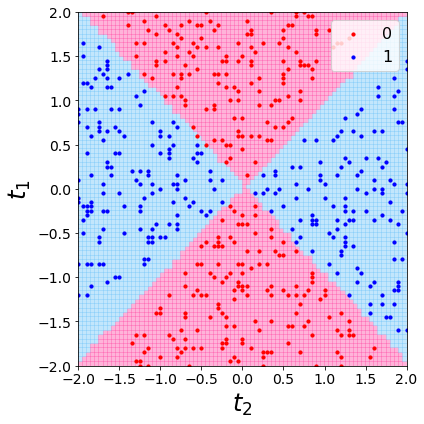

In [20]:
#fig_params, winding_params, contourf_params, legend_params, xlabel_params, ylabel_params, title_params, savefig_params)
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)}
#winding_params = {-1: {"marker": "o", "s": 10, "color": "red", "label": -1}, 
#                  0: {"marker": "o", "s": 10, "color": "darkorange", "label": 0}, \
#                  1: {"marker": "o", "s": 10, "color": "green", "label": 1}, \
#                  2: {"marker": "o", "s": 10, "color": "blue", "label": 2}}
winding_params = {0: {"marker": "o", "s": 10, "color": "red", "label": 0}, 
                  1: {"marker": "o", "s": 10, "color": "blue", "label": 1}}

#pcolormesh_params = {"cmap": ListedColormap(["hotpink", "orange", "lightgreen","lightskyblue"]), "alpha": 0.5}
pcolormesh_params = {"cmap": ListedColormap(["hotpink", "lightskyblue"]), "alpha": 0.5}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
path_to_save = "/home/rio/1901.01963/fig10-6561-100-prediction_grid_0.png"
savefig_params = {"fname": os.path.join(experiment.simulation_dir, path_to_save)}
experiment.pcolormesh_prediction_grid(winding_params, pcolormesh_params, legend_params, fig_params, xlabel_params, \
                                ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                                      tight_params,  savefig_params)

#### Plotting Winding heatmaps

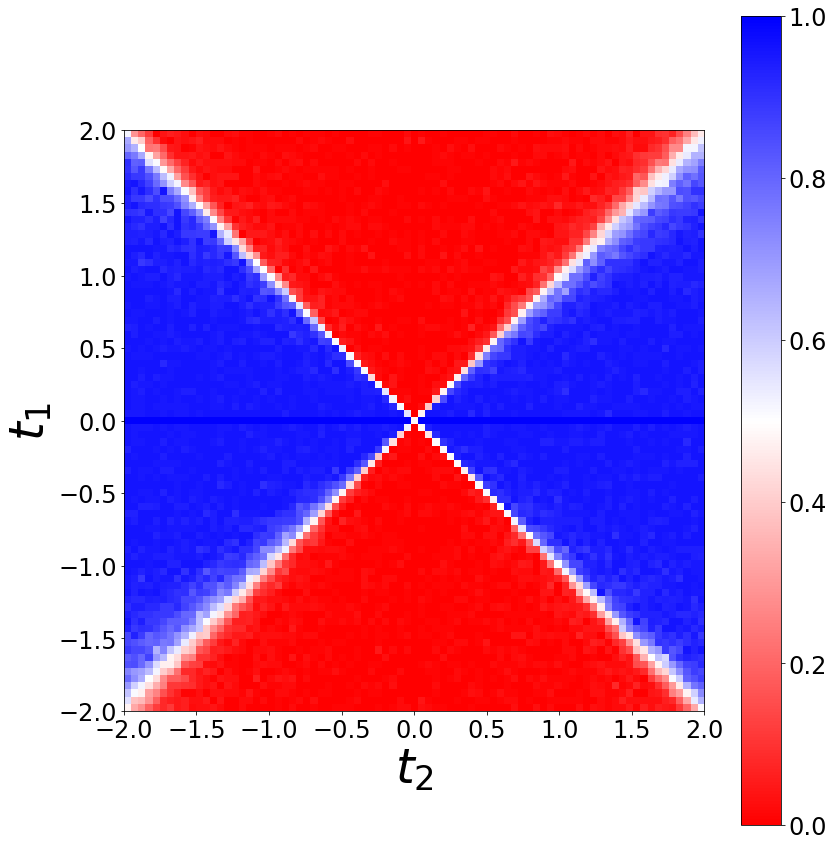

In [21]:
winding = 1
imshow_params = {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2],\
                "vmin": 0, "vmax":1}
colorbar_params={"mappable": None, "labelsize": 24}
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/fig1a-6561-100-winding_grid_0.png"
savefig_params = {"fname": path_to_save}
experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)

## Testing Simulation Class

In [23]:
simulation_name = "nearest_neighbour"
n_experiments = None
load_hamiltonian_summary = False
simulation = Simulation(simulation_name, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary

In [24]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 120232.04it/s]


In [25]:
simulation.hamiltonian_summary

,t1,t2,type_of,0,1,phase,pred_phase
id,,,,,,,
0,-2.0,-2.00,test,0.5139,0.4861,999,0
1,-2.0,-1.95,test,0.6142,0.3858,0,0
2,-2.0,-1.90,test,0.6881,0.3119,0,0
3,-2.0,-1.85,test,0.7709,0.2291,0,0
4,-2.0,-1.80,test,0.8150,0.1850,0,0
5,-2.0,-1.75,test,0.8502,0.1498,0,0
6,-2.0,-1.70,test,0.8723,0.1277,0,0
7,-2.0,-1.65,test,0.9055,0.0945,0,0
8,-2.0,-1.60,test,0.9264,0.0736,0,0


#### Plotting simulation winding heatmaps

Skipping winding 0
Plotting winding 1


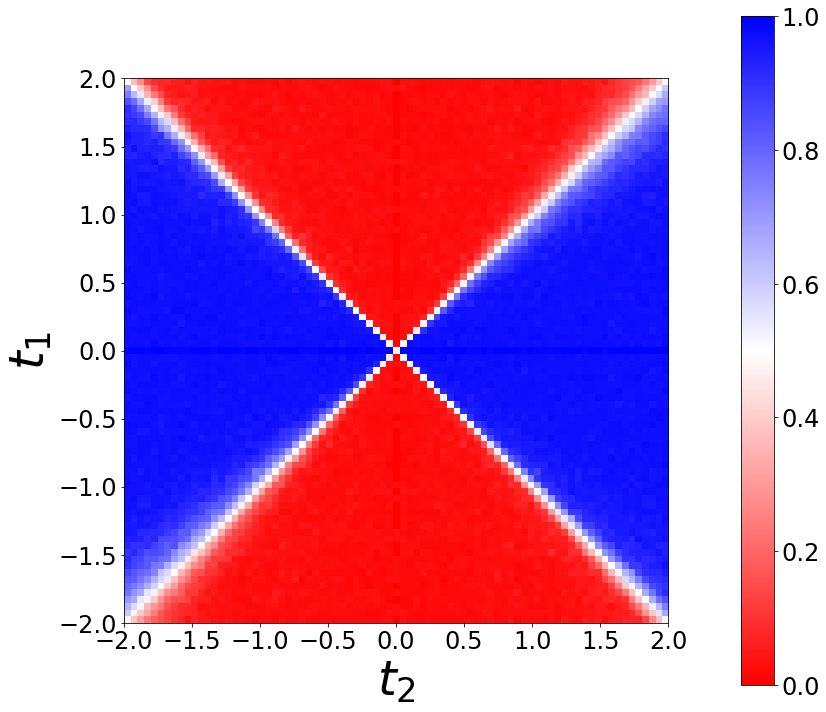

In [26]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/fig1a-6561-100-simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

#### Computing mean accuracies

In [27]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk)

computing mean accuracies: 100%|██████████| 100/100 [00:19<00:00,  5.17it/s]


In [28]:
simulation.mean_accuracy

{'eigenvector_train': 0.9814742805755394,
 'eigenvector_val': 0.9640351800000001,
 'eigenvector_test': 0.7936368483412322,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.9930331753554503}

#### Computing bootstrap accuracies

In [29]:
save_to_disk = True
simulation.compute_bootstrap_accuracy(save_to_disk)

In [30]:
simulation.bootstrap_accuracy

{'hamiltonian_train': 1.0, 'hamiltonian_val': 1.0, 'hamiltonian_test': 1.0}